In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

Data courtesy of Kaggle: https://www.kaggle.com/datasets/drahulsingh/best-selling-books

In [178]:
#Load data

df = pd.read_csv(r"C:\Users\bryan\Desktop\Data_Viz\books.csv")
df.head()

,Book,Author(s),Original language,First published,Approximate sales in millions,Genre
0,A Tale of Two Cities,Charles Dickens,English,1859,200.0,Historical fiction
1,The Little Prince (Le Petit Prince),Antoine de Saint-Exupéry,French,1943,200.0,Novella
2,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120.0,Fantasy
3,And Then There Were None,Agatha Christie,English,1939,100.0,Mystery
4,Dream of the Red Chamber (紅樓夢),Cao Xueqin,Chinese,1791,100.0,Novel


In [179]:
df['Genre'].value_counts()

Novel                    61
Children's Literature    23
Self-help                14
Fantasy                  12
Historical fiction        9
Young Adult               8
Autobiography             7
Social Science            6
Thriller                  4
Romance                   4
Crime                     3
Science fiction           3
Poetry                    2
Erotica                   2
Biography                 2
Gothic novel              2
Popular science           2
Memoir                    2
Christian literature      1
Novella                   1
Pregnancy guide           1
Travel literature         1
Sexology                  1
Adventure                 1
Mystery                   1
Horror                    1
Name: Genre, dtype: int64

In [180]:
#See if there are any missing values

df.isnull().sum()

Book                             0
Author(s)                        0
Original language                0
First published                  0
Approximate sales in millions    0
Genre                            0
dtype: int64

In [181]:
df.describe()

,First published,Approximate sales in millions
count,174.000000,174.000000
mean,1962.522989,30.097126
std,64.268737,27.957985
min,1304.000000,10.000000
25%,1947.000000,14.000000
50%,1974.000000,20.000000
75%,1995.000000,36.300000
max,2018.000000,200.000000


In [182]:
#Additional way to view quantiles

df['Approximate sales in millions'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    10.0
0.25    14.0
0.50    20.0
0.75    36.3
0.95    80.0
Name: Approximate sales in millions, dtype: float64

In [ ]:
df['']

In [183]:
df.shape

(174, 6)

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Book                           174 non-null    object 
 1   Author(s)                      174 non-null    object 
 2   Original language              174 non-null    object 
 3   First published                174 non-null    int64  
 4   Approximate sales in millions  174 non-null    float64
 5   Genre                          174 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 8.3+ KB


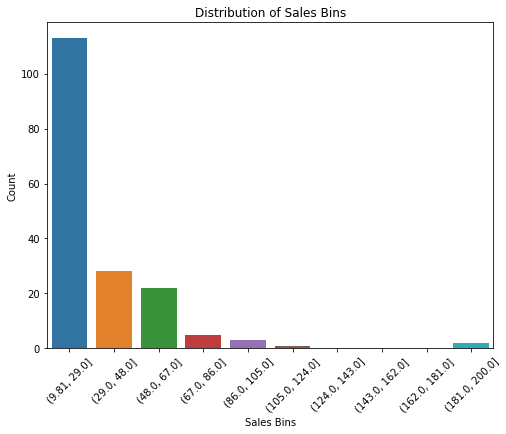

In [185]:
#Binning for bestellers sales

binpop = pd.cut(df['Approximate sales in millions'], 10)
binpop.value_counts()

df['Sales Bins'] = binpop

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sales Bins')
plt.xlabel('Sales Bins')
plt.ylabel('Count')
plt.title('Distribution of Sales Bins')
plt.xticks(rotation=45)
plt.show()

In [186]:
binpop.value_counts()

(9.81, 29.0]      113
(29.0, 48.0]       28
(48.0, 67.0]       22
(67.0, 86.0]        5
(86.0, 105.0]       3
(181.0, 200.0]      2
(105.0, 124.0]      1
(124.0, 143.0]      0
(143.0, 162.0]      0
(162.0, 181.0]      0
Name: Approximate sales in millions, dtype: int64

The vast majority of books are found in the first bin, between 9.81 and 29.0.

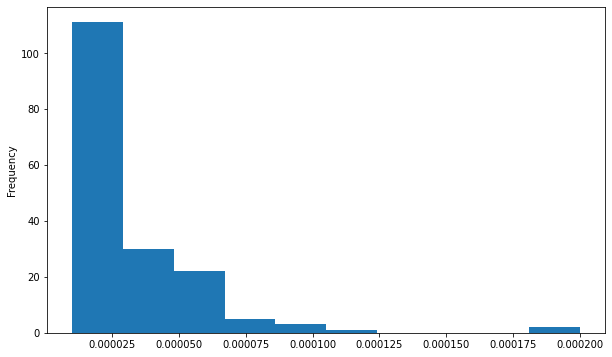

In [187]:
ax = (df['Approximate sales in millions'] / 1_000_000).plot.hist(figsize=(10,6))

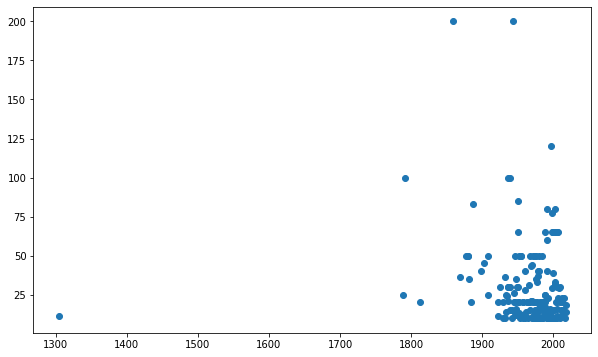

In [188]:
#Scatter plot for sales

plt.figure(figsize=(10, 6))
plt.scatter(x=df['First published'], y=df['Approximate sales in millions'])

In [189]:
min(df['First published'])

1304

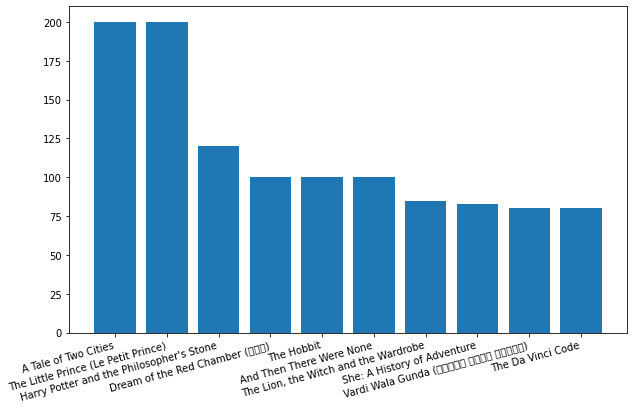

In [229]:
#Determine top 10 books in terms of sales
titles = df.sort_values(by='Approximate sales in millions', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.bar(titles['Book'], titles['Approximate sales in millions'])
plt.xticks(rotation=15, ha='right');

In [190]:
#Earliest bestseller

earliest_publishing_date = df['First published'].min()
earliest_book = df.loc[df['First published'] == earliest_publishing_date, 'Book'].iloc[0]
earliest_book

'The Divine Comedy (La Divina Commedia)'

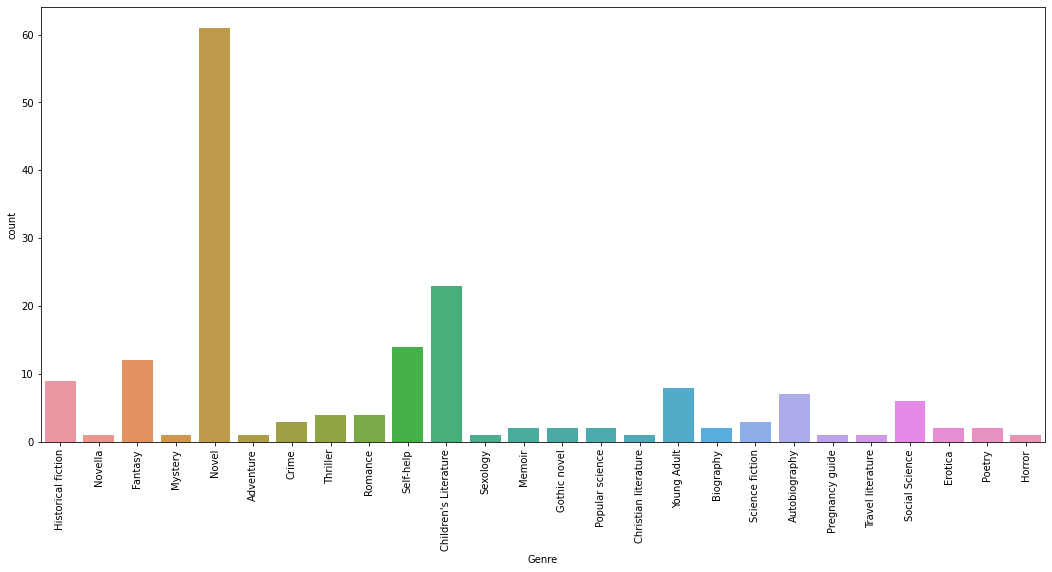

In [191]:
#Plot genre count

plt.figure(figsize=(18, 8))
sns.countplot(data=df, x='Genre')
plt.xticks(rotation=90)
plt.show()

Clearly the most popular genre is the Novel, followed by Children's Literature, Self-Help, and Fantasy

We can now see that Fantasy is the most popular genre in terms of sales, followed by the Novel and self-help

In [192]:
#Determine the mean sales for each genre

df.groupby('Genre').mean()

,First published,Approximate sales in millions
Genre,,
Adventure,1887.000000,83.000000
Autobiography,1981.142857,15.142857
Biography,1963.000000,17.500000
Children's Literature,1952.826087,24.652174
Christian literature,2002.000000,33.000000
Crime,1991.000000,40.333333
Erotica,2011.500000,12.800000
Fantasy,1978.083333,71.416667
Gothic novel,1958.500000,35.000000


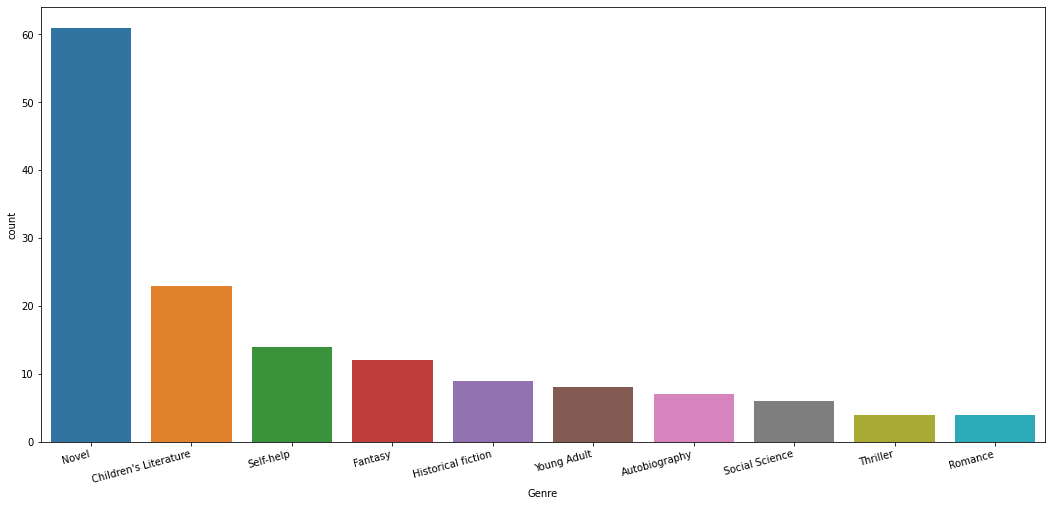

In [193]:
#Determine the top 10 genres

top_genres = df['Genre'].value_counts().head(10)
top_genres = top_genres.sort_values(ascending=False) 

plt.figure(figsize=(18, 8))
sns.countplot(data=df[df['Genre'].isin(top_genres.index)], x='Genre', order=top_genres.index)
plt.xticks(rotation=15, ha='right')
plt.show()

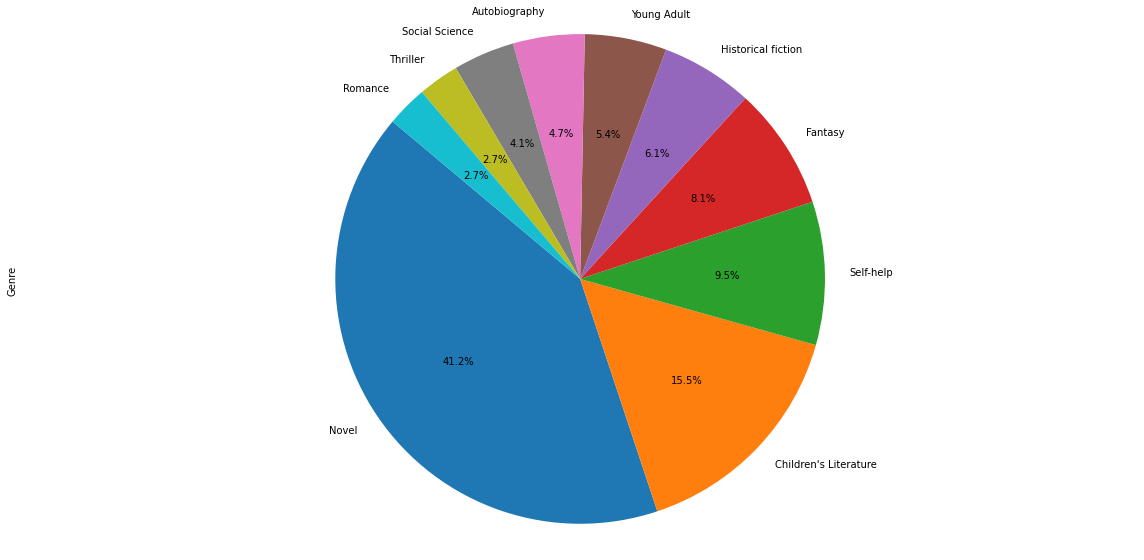

In [194]:
top_genre = df['Genre'].value_counts().head(10)
top_genre = top_genre.sort_values(ascending=False)

plt.figure(figsize=(20, 10))
top_genre.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.show()

In [195]:
#Determine titles for the Fantasy genre

df[df['Genre'] == 'Fantasy']['Book']

2              Harry Potter and the Philosopher's Stone
5                                            The Hobbit
6                  The Lion, the Witch and the Wardrobe
10              Harry Potter and the Chamber of Secrets
11             Harry Potter and the Prisoner of Azkaban
12                  Harry Potter and the Goblet of Fire
13            Harry Potter and the Order of the Phoenix
14               Harry Potter and the Half-Blood Prince
15                 Harry Potter and the Deathly Hallows
16                         The Alchemist (O Alquimista)
29                                       Watership Down
45    The Adventures of Pinocchio (Le avventure di P...
Name: Book, dtype: object

In [196]:
#dDtermine titles for the novel genre

df[df['Genre'] == 'Novel']['Book']

4                         Dream of the Red Chamber (紅樓夢)
17                                The Catcher in the Rye
21     One Hundred Years of Solitude (Cien años de so...
22                                                Lolita
28                                  The Eagle Has Landed
                             ...                        
159                                      The Total Woman
167                                           Life of Pi
168                                     The Front Runner
170                                       Fahrenheit 451
173                                Bridget Jones's Diary
Name: Book, Length: 61, dtype: object

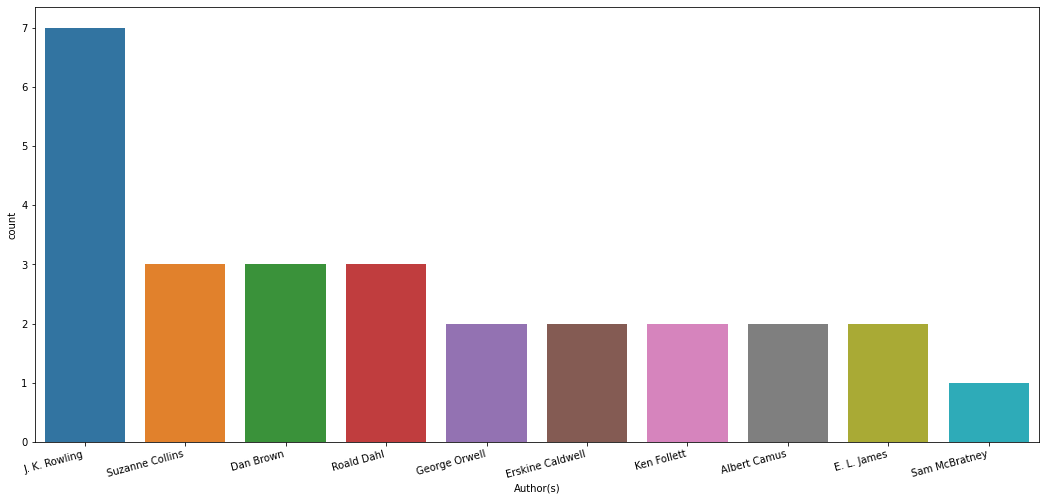

In [197]:
#Determine authors with the most books on the best seller list

top_authors = df['Author(s)'].value_counts().head(10)
top_authors = top_authors.sort_values(ascending=False) 

plt.figure(figsize=(18, 8))
sns.countplot(data=df[df['Author(s)'].isin(top_authors.index)], x='Author(s)', order=top_authors.index)
plt.xticks(rotation=15, ha='right')
plt.show()

In [198]:
df.groupby('Author(s)').mean()

,First published,Approximate sales in millions
Author(s),,
Agatha Christie,1939.0,100.0
Albert Camus,1944.5,11.0
Alex Comfort,1972.0,10.0
Alexander Alexandrovich Fadeyev,1945.0,26.0
Alice Sebold,2002.0,10.0
...,...,...
William Peter Blatty,1971.0,11.0
Xaviera Hollander,1971.0,20.0
Xue Muqiao,1979.0,10.0


In [199]:
#Determine titels for J.K. Rowling's books

df[df['Author(s)'] == 'J. K. Rowling']['Book']

2      Harry Potter and the Philosopher's Stone
10      Harry Potter and the Chamber of Secrets
11     Harry Potter and the Prisoner of Azkaban
12          Harry Potter and the Goblet of Fire
13    Harry Potter and the Order of the Phoenix
14       Harry Potter and the Half-Blood Prince
15         Harry Potter and the Deathly Hallows
Name: Book, dtype: object

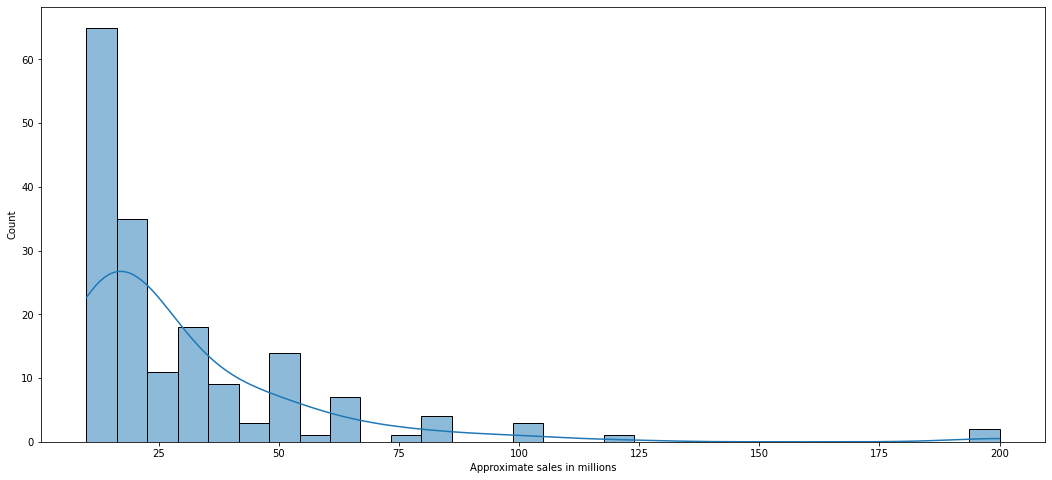

In [200]:
#Plot the sales in millions

plt.figure(figsize=(18, 8))
sns.histplot(data=df, x='Approximate sales in millions', bins=30, kde=True)
plt.show()

In [201]:
df['Approximate sales in millions'].mean()

30.097126436781608

Clearly, there are a number of outliers around 200 million. To isolate these further, let's use a boxplot

<AxesSubplot:xlabel='Approximate sales in millions'>

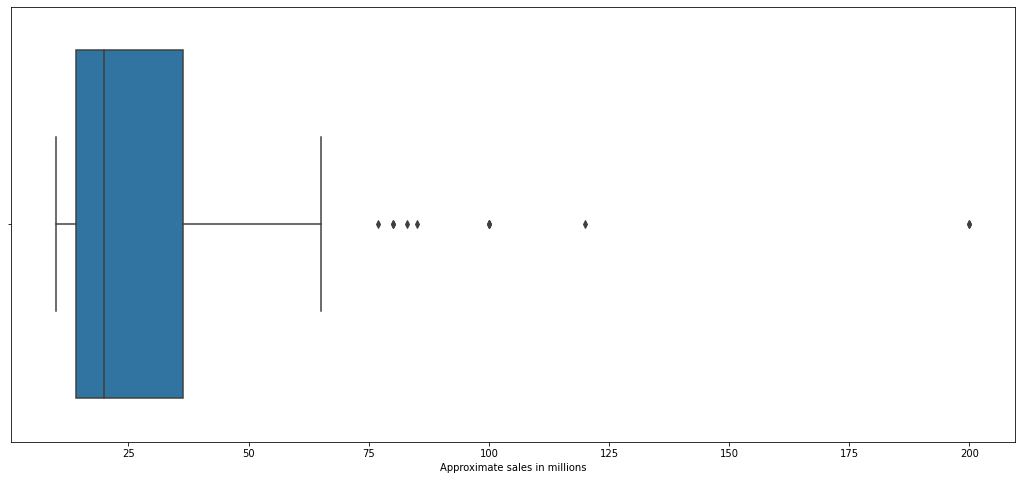

In [202]:
plt.figure(figsize=(18, 8))
sns.boxplot(data=df, x="Approximate sales in millions", hue="Book")

In [231]:
#Determine outliers

df[df['Approximate sales in millions'] >= 75.0]

,Book,Author(s),Original language,First published,Approximate sales in millions,Genre,Sales Bins
0,A Tale of Two Cities,Charles Dickens,English,1859,200.0,Historical fiction,"(181.0, 200.0]"
1,The Little Prince (Le Petit Prince),Antoine de Saint-Exupéry,French,1943,200.0,Novella,"(181.0, 200.0]"
2,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120.0,Fantasy,"(105.0, 124.0]"
3,And Then There Were None,Agatha Christie,English,1939,100.0,Mystery,"(86.0, 105.0]"
4,Dream of the Red Chamber (紅樓夢),Cao Xueqin,Chinese,1791,100.0,Novel,"(86.0, 105.0]"
5,The Hobbit,J. R. R. Tolkien,English,1937,100.0,Fantasy,"(86.0, 105.0]"
6,"The Lion, the Witch and the Wardrobe",C. S. Lewis,English,1950,85.0,Fantasy,"(67.0, 86.0]"
7,She: A History of Adventure,H. Rider Haggard,English,1887,83.0,Adventure,"(67.0, 86.0]"
8,Vardi Wala Gunda (वर्दी वाला गुंडा),Ved Prakash Sharma,Hindi,1992,80.0,Crime,"(67.0, 86.0]"
9,The Da Vinci Code,Dan Brown,English,2003,80.0,Thriller,"(67.0, 86.0]"


In [204]:
df[df['Approximate sales in millions'] >= 75.0]['Genre'].value_counts()

Fantasy               4
Historical fiction    1
Novella               1
Mystery               1
Novel                 1
Adventure             1
Crime                 1
Thriller              1
Name: Genre, dtype: int64

In the top ten, there are four Fantasy books represented. The rest are single entries, solodifying Fantasy as the best selling genre (outside of Unknown)

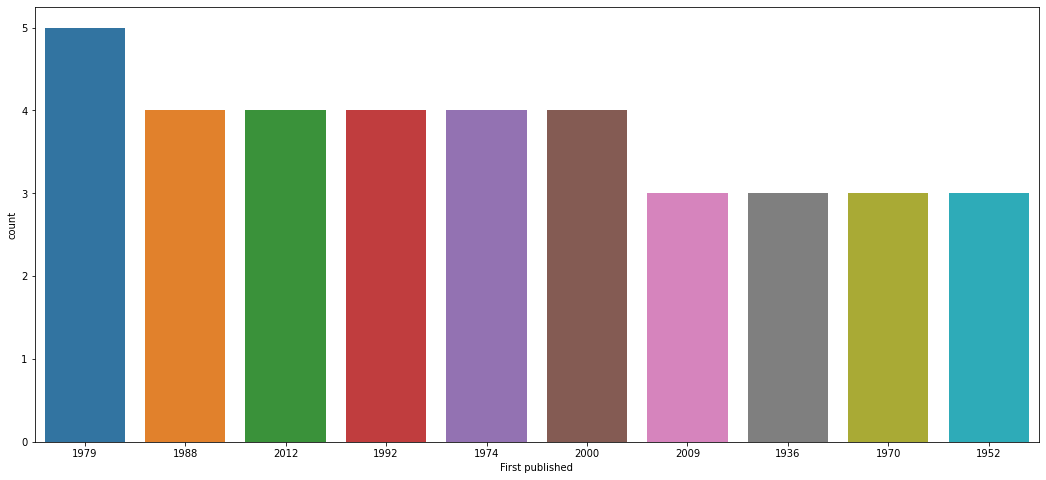

In [205]:
#Determine the top 10 years with the most bestsellers

top_years = df['First published'].value_counts().head(10)
top_years = top_years.sort_values(ascending=False)

plt.figure(figsize=(18, 8))
sns.countplot(data=df[df['First published'].isin(top_years.index)], x='First published', order = top_years.index)
plt.xticks(rotation=0)
plt.show()

In [206]:
#What are the bestseller titles in 1979?

df[df['First published'] == 1979]['Book']

38                                  Flowers in the Attic
42                                         Kane and Abel
112    The Neverending Story (Die unendliche Geschichte)
125                 The Hitchhiker's Guide to the Galaxy
161    Problems in China's Socialist Economy (中国社会主义经...
Name: Book, dtype: object

In [207]:
df[df['First published'] == 1979]['Genre']

38              Gothic novel
42                     Novel
112    Children's Literature
125          Science fiction
161           Social Science
Name: Genre, dtype: object

In [208]:
#What are the bestseller titles in 1988?

df[df['First published'] == 1988]['Book']

16     The Alchemist (O Alquimista)
65          A Brief History of Time
80                   Kitchen (キッチン)
108                         Matilda
Name: Book, dtype: object

In [209]:
df[df['First published'] == 1988]['Genre']

16                   Fantasy
65           Popular science
80                     Novel
108    Children's Literature
Name: Genre, dtype: object

In [210]:
#Bestsellers from the 20th century

years_to_select = list(range(1900, 2000))
twenty_cen = df[df['First published'].isin(years_to_select)]['Genre'].value_counts()

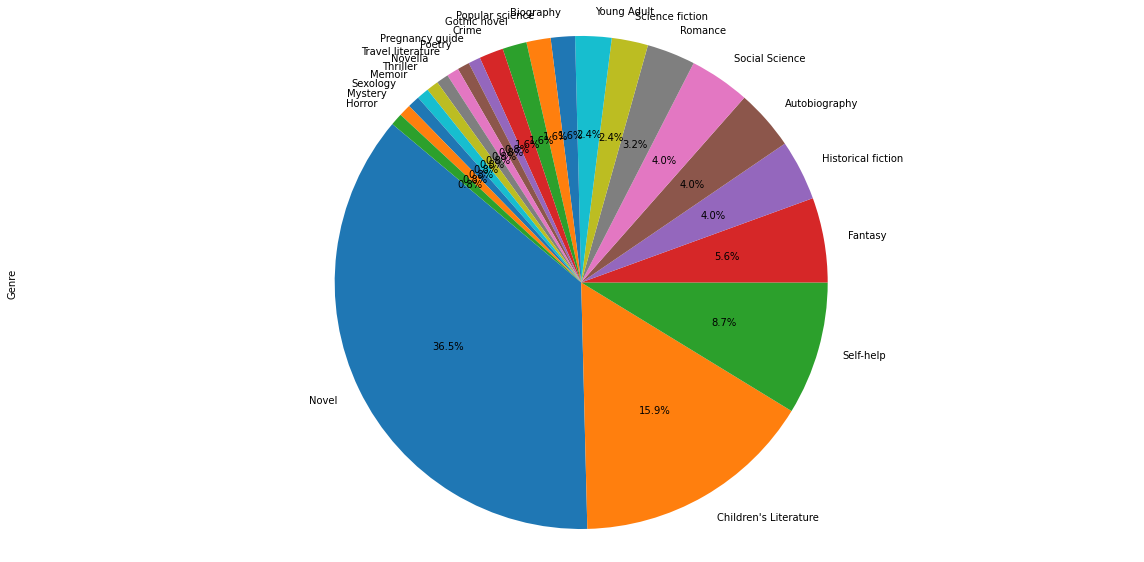

In [211]:
plt.figure(figsize=(20, 10))
twenty_cen.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.show()

In [212]:
#Bestsellers from the 21st century

years_to_select = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
                  2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
df[df['First published'].isin(years_to_select)]['Book']

9                                      The Da Vinci Code
12                   Harry Potter and the Goblet of Fire
13             Harry Potter and the Order of the Phoenix
14                Harry Potter and the Half-Blood Prince
15                  Harry Potter and the Deathly Hallows
41                                       Angels & Demons
49                               The Purpose Driven Life
50                                       The Kite Runner
59     The Girl with the Dragon Tattoo (Män som hatar...
60                                       The Lost Symbol
61                                      The Hunger Games
72                                The Fault in Our Stars
73                                 The Girl on the Train
74                                             The Shack
78                                         Catching Fire
79                                            Mockingjay
83                                             Gone Girl
88                             

In [213]:
years_to_select = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
                  2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
twenty_first = df[df['First published'].isin(years_to_select)]['Genre'].value_counts()

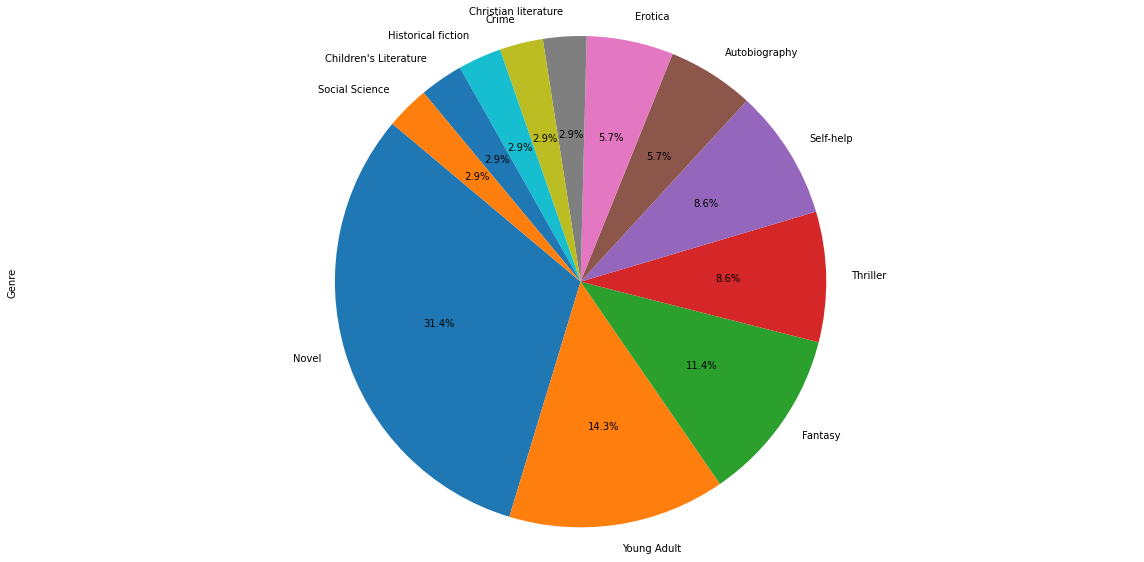

In [214]:
#pie chart for the 21st_century

plt.figure(figsize=(20, 10))
twenty_first.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.show()

The Novel has been the most popular genre from the 20th century on, with Young Adult fiction taking over Children's Literature as the second most lucrative genre. 

In [215]:
#Most popular genres in 1952?

df[df['First published'] == 1952]['Genre']

31     Children's Literature
100                Self-help
131                    Novel
Name: Genre, dtype: object

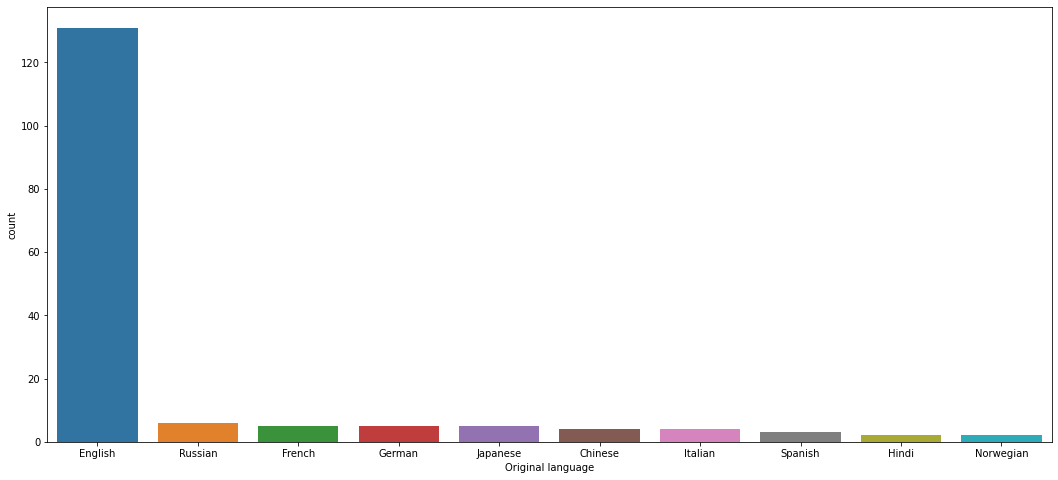

In [216]:
#Top language

top_language = df['Original language'].value_counts().head(10)
top_language = top_language.sort_values(ascending=False)

plt.figure(figsize=(18, 8))
sns.countplot(data=df[df['Original language'].isin(top_language.index)], x='Original language', order = top_language.index)
plt.xticks(rotation=0)
plt.show()

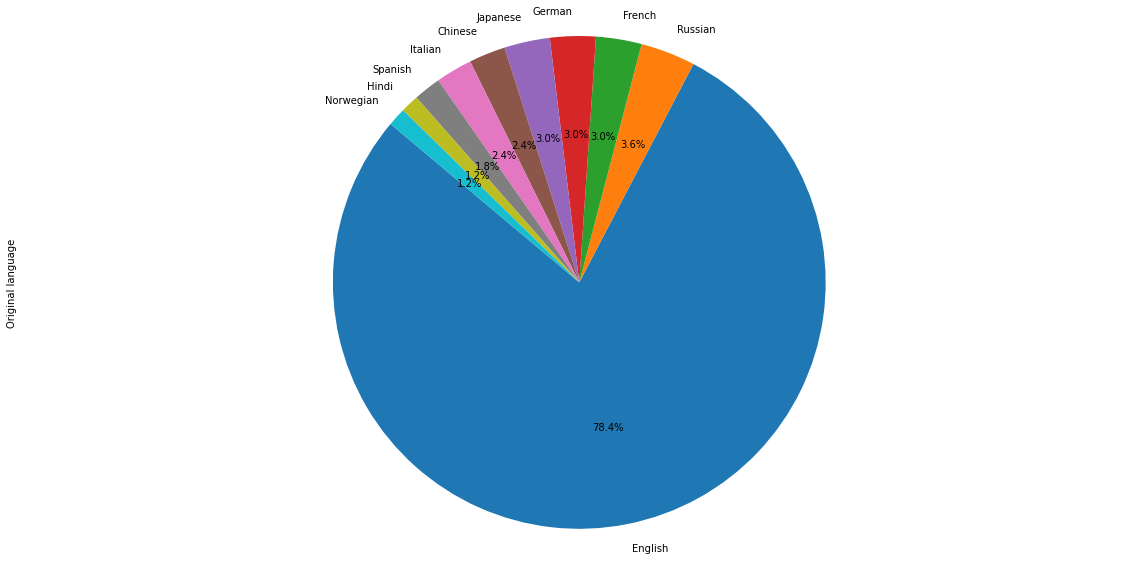

In [217]:
plt.figure(figsize=(20, 10))
top_language.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.show()

English language books are the vast majority with 78.4% of sales

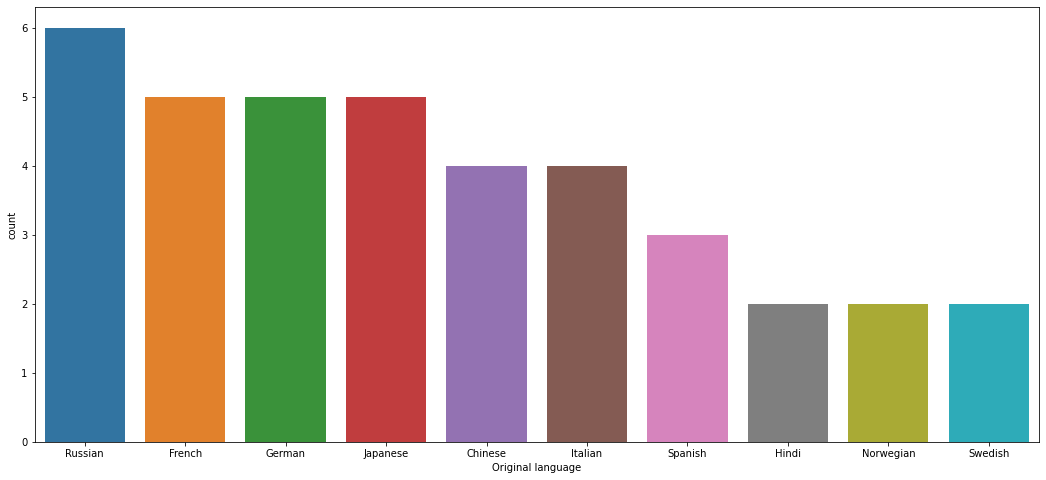

In [218]:
#Becasue English is so overrepresented, I removed English to get a better sense of the spread of language

top_languages = df[df['Original language'] != 'English']['Original language'].value_counts().head(10)
top_languages = top_languages.sort_values(ascending=False)

plt.figure(figsize=(18, 8))
sns.countplot(data=df[df['Original language'].isin(top_languages.index)], x='Original language', order=top_languages.index)
plt.xticks(rotation=0)
plt.show()

In [219]:
#suburst plot, showing Language, Genre, and author

fig=px.sunburst(df,path=['Original language', 'Genre','Author(s)'],values='Approximate sales in millions',
                color='Approximate sales in millions',height=1200,width=1200)
fig.update_layout(title_pad_l=330)
fig.show();

# Findings


1. The most popular genre is the Novel (41.2%), followed by Children's Literature (15.5%), Self-Help (9.5%), and Fantasy (8.1%)
2. Young Adult fiction has taken over Children's Literature as the second most lucrative genre in the 21st century. 
3. The most popular language is English by a large margin (78.4%), followed by Russian (3.6%)
4. The most lucrative year for bestsellers was 1988, followed closely by 1979
5. The mean sales figures is 30.1 million
6. The standard deviaition of sales is 27.95, which is influenced by extreme outliers, such as The Little Prince and A Tale of Two Cities
7. J.K. Rowling has the most sales as a single author, followed by Suzanne Collins, Roald Dahl, and Dan Brown
8. Only 6 books have over 100 million in sales, and two out of those six are considered Fantasy
9. Only 2 books have over 200 million in sales: A Tale of Two Cities and the Little Prince
10. The newest genre to make it to the bestseller list is Young adult romantic novel
11. Only 1 book in this dataset was written before 1700, which is Dante's The Divine Comedy

# Assertions to Test

1. 11 books with over 100 million in sales may be skewing the data
2. Fantasy may be overrepresented due to the popularity of Rowling's Harry Potter series and The Hobbit

In [233]:
df2 = df.drop(df[df['Author(s)'] == 'J.K. Rowling'].index)

In [234]:
df2 = df.drop(df[df['Book'].str.contains('Potter')].index)

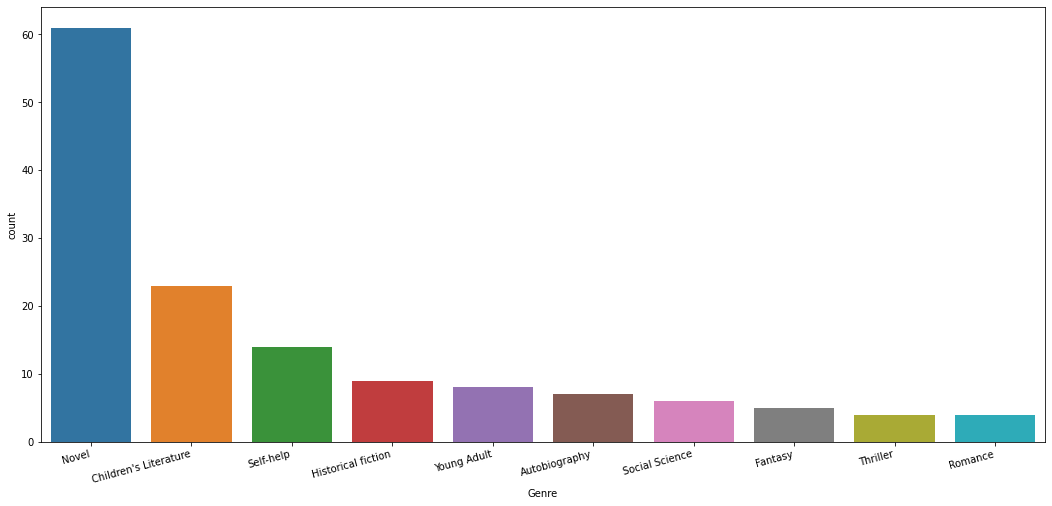

In [235]:
#After removing Harry Potter and the Novel, what is the most represented genre in terms of bestsellers?

top_genres = df2['Genre'].value_counts().head(10)
top_genres = top_genres.sort_values(ascending=False) 

plt.figure(figsize=(18, 8))
sns.countplot(data=df2[df2['Genre'].isin(top_genres.index)], x='Genre', order=top_genres.index)
plt.xticks(rotation=15, ha='right')
plt.show()

In [224]:
#let's remove authors with over 100 million sales from the dataset to see if Fantasy remains the best represented genre amongst bestsellers

df3 = df.drop(df[df['Author(s)'] == 'J.K. Rowling'].index)
df3 = df.drop(df[df['Author(s)'] == 'Charles Dickens'].index)
df3 = df.drop(df[df['Author(s)'] == 'Antoine de Saint-Exupéry'].index)
df3 = df.drop(df[df['Author(s)'] == 'Agatha Christie'].index)
df3 = df.drop(df[df['Author(s)'] == 'Cao Xueqin'].index)
df3 = df.drop(df[df['Author(s)'] == 'J. R. R. Tolkien'].index)

In [225]:
df3 = df.drop(df[df['Book'].str.contains('Potter')].index)
df3 = df.drop(df[df['Book'] == 'A Tale of Two Cities'].index)
df3 = df.drop(df[df['Book'] == 'The Hobbt'].index)
df3 = df.drop(df[df['Book'] == 'Dream of the Red Chamber (紅樓夢)'].index)
df3 = df.drop(df[df['Book'] == 'The Little Prince (Le Petit Prince)'].index)
df3 = df.drop(df[df['Book'] == 'And Then There Were'].index)

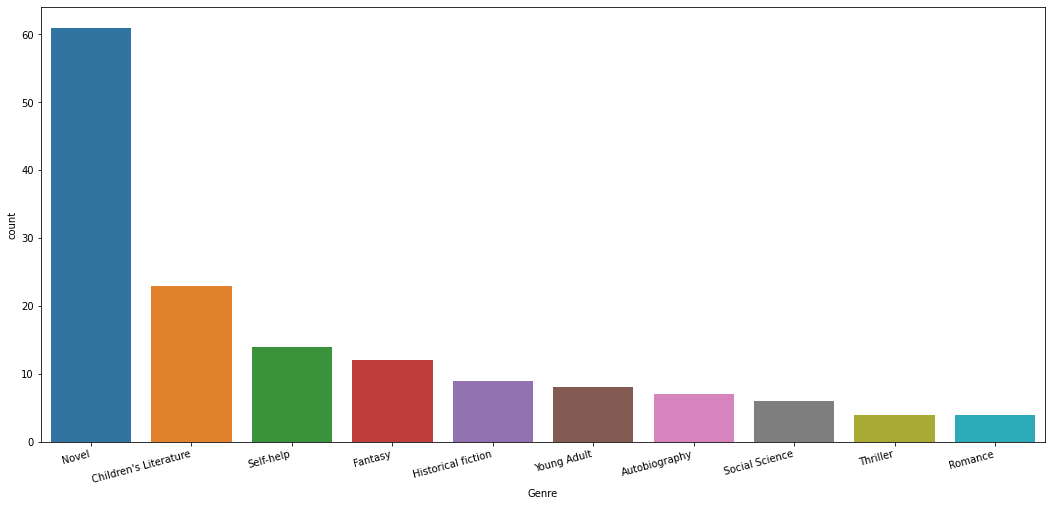

In [226]:
#after removing Harry Potter, what is the most represented genre in terms of bestsellers?

top_genres = df3['Genre'].value_counts().head(10)
top_genres = top_genres.sort_values(ascending=False) 

plt.figure(figsize=(18, 8))
sns.countplot(data=df3[df3['Genre'].isin(top_genres.index)], x='Genre', order=top_genres.index)
plt.xticks(rotation=15, ha='right')
plt.show()

Conclusion: Even after removing J.K. Rowling and authors with over 100 million in sales, the novel remains the most lucrative genre, which makes sense, given that the novel is perhaps the most broad genre. With that being said, the growing popularity of Young Adult and Fantasy, it would be smart to promote these genres. 